In [477]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [478]:
# Loading the diabetes_dirty dataset
diabetes_dataset = pd.read_csv('diabetes_dirty.csv')

In [479]:
# Brief look at the dataset
print(diabetes_dataset.columns.tolist())

diabetes_dataset.head(5)

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'PROGRESSION']


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


The independent variables will be these columns: 
- BMI
- BP
- S1
- S2
- S3
- S4
- S5
- S6

And the dependent variable is:
- PROGRESSION

Essentially, the independent variables are the attributes describing vital conditions of the patients and the information which leads us to measure the progress of the patients.
A person's progress in the condition is of importance and needs to be predicted based on the patients' conditions.

In [480]:
# Differentiating between the independent and dependent variables

# Independent variables
X_data = diabetes_dataset.loc[:, ['BMI','BP','S1','S2','S3','S4','S5','S6']].values

# Dependent variables
y_data = diabetes_dataset.loc[:, ['PROGRESSION']].values

# Reshaping the data
y_data = y_data.reshape(-1, 1)
X_data = X_data.reshape(-1, X_data.shape[1])

In [481]:
# Generating the training and test sets
# Comprising 80% and 20% of the data

# random seed for getting same result each running time
rseed = 72
# Splitting the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state = rseed)


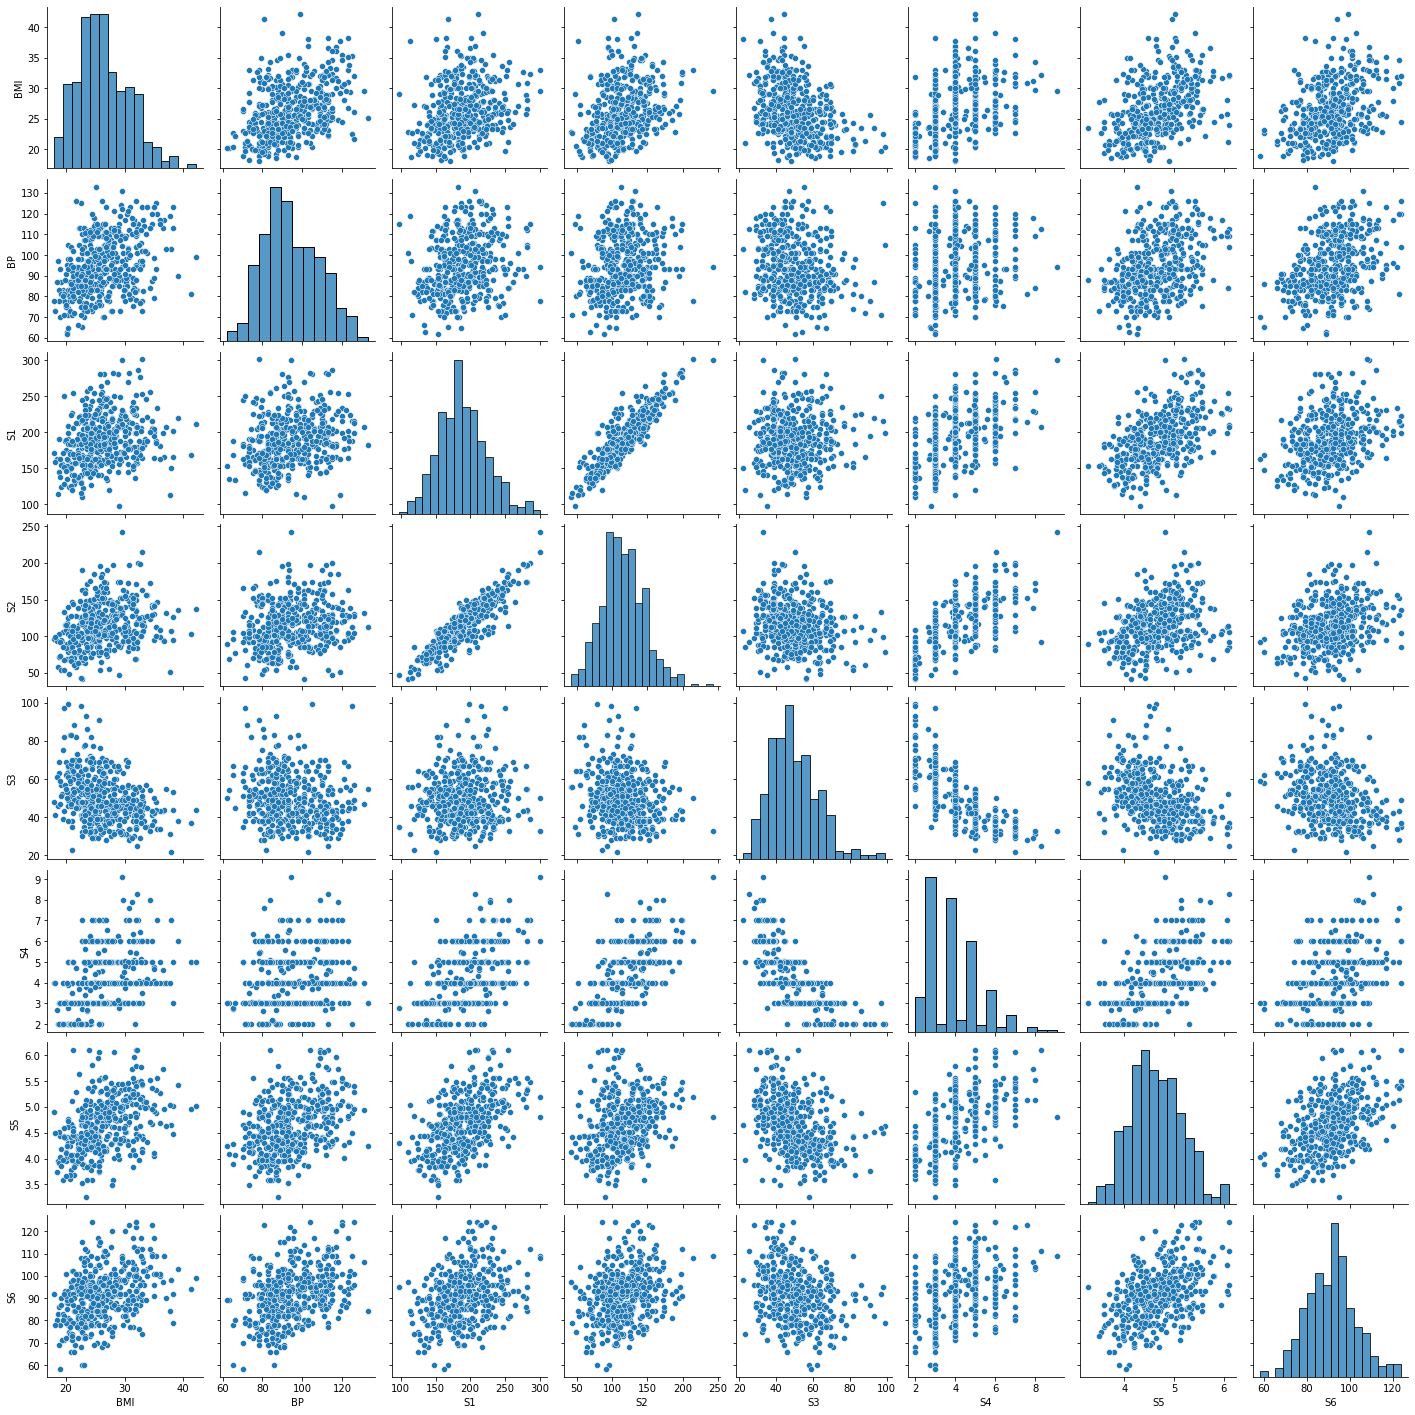

In [482]:
# Investigating the underlying distribution 
# of the independent variables

# Excluding the categorical data because of the type of problem
# The problem needs Regression algorithm approach
# Thus only the continous variables are of interest

sns.pairplot(data=diabetes_dataset.drop(['SEX','AGE','PROGRESSION'],axis=1))

The features except 'S4' follow a Gaussian distribution, so it looks like Standardisation would be a better fit for scaling the data.

Although I tried to transform the 'S4' feature using Normalisation separately.

In [483]:
# List of column numbers which follow normal distribution
gaussian_features = [0, 1, 2, 3, 4, 6, 7]
# List of column numbers which don't follow normal distribution
non_gaussian_features = [5] # Indexing of S4

# Define scaler using different scalers for different feature sets
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
# Setting the first scaler for the gaussian features and the next one for the rest
# By giving the transformer a name, instantiating the scaler,
# And giving each the list of the columns' index they need to transform
sc = ColumnTransformer(
    transformers=[
        ('gaussian', StandardScaler(), gaussian_features),
        ('non_gaussian', MinMaxScaler(), non_gaussian_features)
    ])

# Fit the scaler on the training set and then transforming it
X_train = sc.fit_transform(X_train)

# Transforming the test set using the fitted scaler
X_test = sc.transform(X_test)



In [484]:
# Generating a multiple linear regression

# Instantiating the linear regression
linear_model = LinearRegression()
# Fitting the training set to the model
model = linear_model.fit(X_train, y_train)

# Generating predictions on the test set
predictions = linear_model.predict(X_test)


In [485]:
# Printing the coefficients and the intercept
print("The intercept: \n", linear_model.intercept_)
print("The coefficients: \n", linear_model.coef_)

The intercept: 
 [133.68023231]
The coefficients: 
 [[ 26.36083832  10.23968948 -35.33050727  20.65812017   8.73106506
   33.3148691    1.82636985  55.61173542]]


In [486]:
# R squared score
r2 = r2_score(y_test, predictions)
print ("R2 Score:", r2)

R2 Score: 0.6287994968311327


The R2 score is not high, as it is not close to one. However, it still shows that our prediction model manages to make close predictions approximately 62% of the time.

During the process, I considered finding correlations between the features and their correlation with the output label by plotting a heatmap of the correlation matrix of the features in the dataset.

Even after selecting the features that were closely related to each other or showed a strong correlation with the output, the R2 score didn't improve and remained around 0.45.

Since the task required keeping all the independent variables, I did not continue with this approach.

Another approach to improving the R2 score involved testing different random seeds when splitting the dataset into training and test sets. By doing this, I managed to improve the R2 score from 0.46 to 0.62.

Overall, I believe it is worth fitting models other than linear regression to this dataset and experimenting to see how the prediction model performs compared to the current model.